## Reuters corpus visualization data processing and exploration

In this notebook I continue processing the CSV that was created with reuters-load.ipynb.

In [2]:
import pandas as pd

In [10]:
import re
WS_REMOVAL = re.compile(r"\s+")

In [5]:
reuters = pd.read_csv('csv/reuters.csv', delimiter=';')
reuters

,id,date,location,country,codes,desc,headline,text,essential
0,635751,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
1,635752,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
2,635753,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
3,635754,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
4,635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...,...
299768,771562,1997-07-31,NaN,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
299769,771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
299770,771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...
299771,771565,1997-07-31,NaN,GERMANY,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters German Advertising & Media Digest -Jul...,-------------- GAM -------------------- REUTER...,based without News Sueddeutsche child channel ...


In [8]:
reuters_by_id = reuters.set_index('id')
reuters_by_id

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,NaN,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,NaN,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,NaN,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [13]:
reuters_by_id.describe()

,date,location,country,codes,desc,headline,text,essential
count,299773,281009,299771,299773,299773,299767,299772,299773
unique,127,5802,225,8326,8326,274873,294893,296263
top,1997-05-23,LONDON,USA,"['C15', 'C151', 'CCAT']","['PERFORMANCE', 'ACCOUNTS/EARNINGS', 'CORPORAT...",GOVERNMENT LIST.,The Belgian central bank said in its daily int...,Fax 6810 2 emergency government unchanged The ...
freq,3968,26792,90118,22203,22203,297,58,56


In [14]:
reuters_by_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299773 entries, 635751 to 771566
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       299773 non-null  object
 1   location   281009 non-null  object
 2   country    299771 non-null  object
 3   codes      299773 non-null  object
 4   desc       299773 non-null  object
 5   headline   299767 non-null  object
 6   text       299772 non-null  object
 7   essential  299773 non-null  object
dtypes: object(8)
memory usage: 20.6+ MB


In [15]:
reuters_by_id.fillna('', inplace=True)
reuters_by_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299773 entries, 635751 to 771566
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       299773 non-null  object
 1   location   299773 non-null  object
 2   country    299773 non-null  object
 3   codes      299773 non-null  object
 4   desc       299773 non-null  object
 5   headline   299773 non-null  object
 6   text       299773 non-null  object
 7   essential  299773 non-null  object
dtypes: object(8)
memory usage: 20.6+ MB


In [11]:
def remove_extra_white(s):    
    stripped = WS_REMOVAL.sub(' ', s).strip()
    return stripped

In [16]:
# remove extra white spaces from the headlines
reuters_by_id['headline'] = reuters_by_id['headline'].apply(lambda x: remove_extra_white(x))

In [17]:
reuters_by_id

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,,EU,"['G15', 'GCAT']","['EUROPEAN COMMUNITY', 'GOVERNMENT/SOCIAL']",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,,CANADA,"['M14', 'M143', 'MCAT']","['COMMODITY MARKETS', 'ENERGY MARKETS', 'MARKE...",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"['M11', 'MCAT']","['EQUITY MARKETS', 'MARKETS']","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,,FRANCE,"['C32', 'CCAT']","['ADVERTISING/PROMOTION', 'CORPORATE/INDUSTRIAL']",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,['C152'],['COMMENT/FORECASTS'],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"['GCAT', 'GSCI']","['GOVERNMENT/SOCIAL', 'SCIENCE AND TECHNOLOGY']",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [18]:
print(reuters_by_id.loc[635754, 'headline'])

Suncor cuts Canada light oil prices.


In [19]:
print(reuters_by_id.loc[635754, 'text'])

COMPANY	 EFF DATE	LT SWEET		LT SOUR 				CDLR/BBL CDLR/M3   CDLR/BBL   CDLR/M3 IMPERIAL OIL  06/04/97   27.19  171.00	25.44     160.00 SHELL CANADA  06/03/97   27.35  172.00	25.76     162.00 SUNCOR*	 06/04/97   27.03  170.00	25.44     160.00 PETRO-CANADA  06/03/97   27.19  171.00	25.44     160.00 KOCH OIL	06/03/97   27.35  172.00	25.91     163.00 Light sweet marker crude  at Edmonton/Swan Hills......40 API, 0.3 pct sulphur Light sour at Cromer, Man....33 API, 1.1 pct sulphur *Suncor light sour...........35 API, 1.2 pct sulphur 


In [20]:
print(reuters_by_id.loc[635754, 'essential'])

........... sour 1.1 KOCH Light COMPANY .... 170.00 EFF CANADA Hills OIL , 06/04/97 171.00 DATE SHELL CDLR/M3 25.44 ...... . 0.3 light Edmonton/Swan marker pct Canada 160.00 API 35 25.91 PETRO-CANADA 163.00 27.19 SWEET IMPERIAL 40 oil 33 CDLR/BBL SOUR SUNCOR LT Cromer 27.35 cut sweet 162.00 price * Suncor crude 27.03 06/03/97 172.00 25.76 1.2 Man sulphur


### Exploring topic combination frequencies

In [21]:
desc_freqs = reuters_by_id['desc'].value_counts()
desc_freqs

['PERFORMANCE', 'ACCOUNTS/EARNINGS', 'CORPORATE/INDUSTRIAL']                                                                                                                                                         22203
['PERFORMANCE', 'COMMENT/FORECASTS', 'CORPORATE/INDUSTRIAL']                                                                                                                                                         19751
['EQUITY MARKETS', 'MARKETS']                                                                                                                                                                                        15791
['COMMODITY MARKETS', 'SOFT COMMODITIES', 'MARKETS']                                                                                                                                                                 14675
['GOVERNMENT/SOCIAL', 'SPORTS']                                                                                             

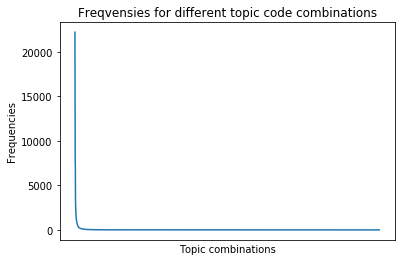

In [26]:
import matplotlib.pyplot as plt

# There are 4596 combinations in total
plt.figure()
desc_freqs.plot()
plt.title("Freqvensies for different topic code combinations")
plt.xlabel("Topic combinations")
plt.ylabel("Frequencies")
#plt.axis('off')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

### Exploring single topic frequencies

In [28]:
# function to explore the amounts of single topics, return a sorted dictionary

def desc_amount_check(data):
    desc_amount_dict = {}
    for index, desc_list in data['desc'].iteritems():
        for desc in desc_list:
            if desc_amount_dict.get(desc) == None:
                desc_amount_dict[desc] = 1
            else: 
                desc_amount_dict[desc] += 1
                
    sorted_desc_amounts = dict(sorted(desc_amount_dict.items(), key=lambda item: item[1]))            
    return sorted_desc_amounts  

In [32]:
# change desc and codes columns to lists (were strings)
reuters_by_id['desc'] = reuters_by_id['desc'].apply(eval)
reuters_by_id['codes'] = reuters_by_id['codes'].apply(eval)

In [34]:
large_desc_amount_dict = desc_amount_check(reuters_by_id)
large_desc_amount_dict

{'MILLENNIUM ISSUES': 4,
 'EC GENERAL': 8,
 'CAPACITY UTILIZATION': 19,
 'INVENTORIES': 38,
 'EC ENVIRONMENT ISSUES': 55,
 'CONSUMER CREDIT': 70,
 'HOUSING STARTS': 122,
 'FASHION': 141,
 'PERSONAL INCOME': 162,
 'TRAVEL AND TOURISM': 187,
 'OBITUARIES': 301,
 'WHOLESALE PRICES': 348,
 'MARKET SHARE': 381,
 'DEFENCE CONTRACTS': 401,
 'RETAIL SALES': 432,
 'INSOLVENCY/LIQUIDITY': 591,
 'INDUSTRIAL PRODUCTION': 619,
 'WELFARE, SOCIAL SERVICES': 664,
 'EC CORPORATE POLICY': 671,
 'EC INSTITUTIONS': 704,
 'MONEY SUPPLY': 747,
 'UNEMPLOYMENT': 760,
 'EC AGRICULTURE POLICY': 761,
 'CONSUMER FINANCE': 778,
 'EC COMPETITION/SUBSIDY': 801,
 'OUTPUT/CAPACITY': 857,
 'ADVERTISING/PROMOTION': 919,
 'BALANCE OF PAYMENTS': 949,
 'RESEARCH/DEVELOPMENT': 958,
 'HUMAN INTEREST': 975,
 'SCIENCE AND TECHNOLOGY': 989,
 'RELIGION': 989,
 'RESERVES': 1019,
 'LOANS/CREDITS': 1043,
 'EC INTERNAL MARKET': 1101,
 'ARTS, CULTURE, ENTERTAINMENT': 1310,
 'CREDIT RATINGS': 1358,
 'DOMESTIC MARKETS': 1423,
 'EC EXTE

In [37]:
topic_amount_df = pd.DataFrame.from_dict(large_desc_amount_dict,  orient='index')
topic_amount_df.reset_index(level=0, inplace=True)
topic_amount_df.rename(columns={0: "AMOUNT", "index": "DESC"}, inplace=True)
topic_amount_df

,DESC,AMOUNT
0,MILLENNIUM ISSUES,4
1,EC GENERAL,8
2,CAPACITY UTILIZATION,19
3,INVENTORIES,38
4,EC ENVIRONMENT ISSUES,55
...,...,...
98,ECONOMICS,42374
99,PERFORMANCE,59207
100,MARKETS,81940
101,GOVERNMENT/SOCIAL,82580


In [38]:
topics_desc_index = topic_amount_df.set_index('DESC')
topics_desc_index

,AMOUNT
DESC,
MILLENNIUM ISSUES,4
EC GENERAL,8
CAPACITY UTILIZATION,19
INVENTORIES,38
EC ENVIRONMENT ISSUES,55
...,...
ECONOMICS,42374
PERFORMANCE,59207
MARKETS,81940


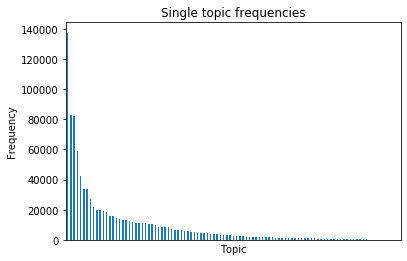

In [42]:
plt.figure()
topics_desc_index.sort_values(by="AMOUNT",ascending=False)["AMOUNT"].plot.bar()
plt.title("Single topic frequencies")
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

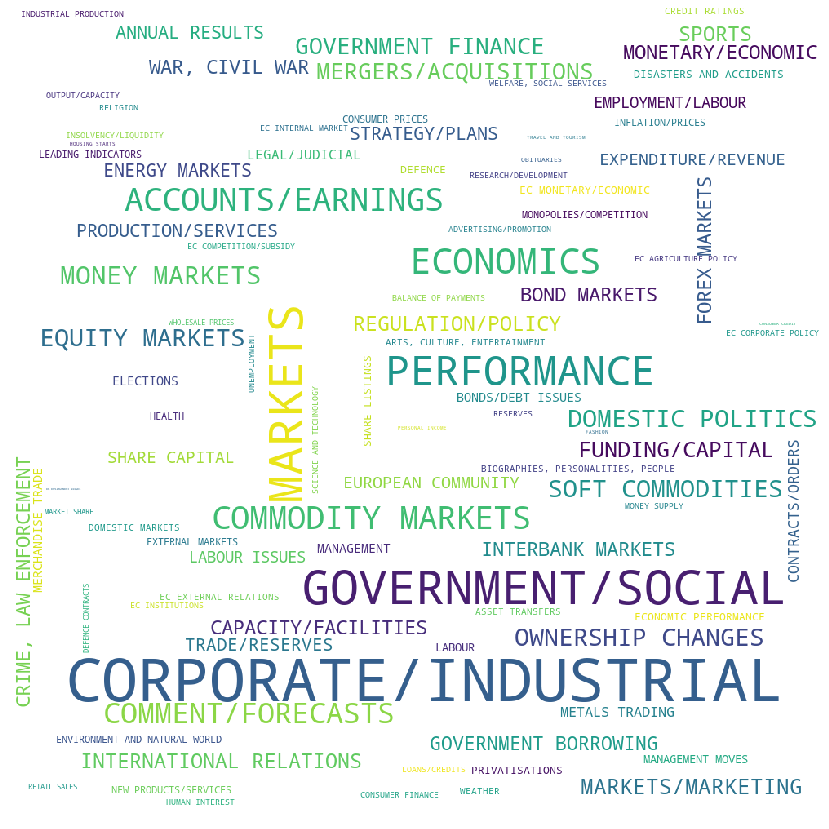

In [43]:
# wordcloud from single topic frequencies

from wordcloud import WordCloud

topic_cloud = WordCloud(background_color="white", width=1000, height=1000).generate_from_frequencies(large_desc_amount_dict)
plt.figure(figsize=(15,15))
plt.imshow(topic_cloud)
plt.axis("off")
plt.show()

### Let's explore locations

In [45]:
reuter_contry_loc = reuters_by_id.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location                       
                                                 1
             ASMARA                              1
ABU DHABI    ABU DHABI                          53
             ABU DHABI, United Arab Emirates     1
AFGHANISTAN                                      3
                                                ..
ZIMBABWE     HARARE, Zimbabwe                    4
             HHARARE                             1
             NYANGA, Zimbabwe                    2
             VICTORIA FALLS                      1
             VICTORIA FALLS, Zimbabwe            3
Length: 6111, dtype: int64

In [47]:
reuter_contries = reuters_by_id.groupby(by=['country']).size()
reuter_contries

country
                 2
ABU DHABI       54
AFGHANISTAN    181
AFRICA           4
ALBANIA        632
              ... 
YEMEN          151
YUGOSLAVIA     654
ZAIRE          624
ZAMBIA         182
ZIMBABWE       664
Length: 226, dtype: int64

In [48]:
reuter_locations = reuters_by_id.groupby(by=['location']).size()
reuter_locations

location
                                18764
AACHEN, Germany                    19
AALST, Belgium                      1
AARAU, Switzerland                  2
ABBADIA SAN SALVATORE, Italy        1
                                ...  
ZUG, Switzerland                    7
ZURICH                           1137
ZURICH, Switzerland                16
ZVORNIK, Bosnia                     1
ZYWIEC, Poland                      2
Length: 5803, dtype: int64

In [50]:
reuters_df_loc_edited = reuters_by_id.copy(deep=True)

In [51]:
reuters_df_loc_edited['location'] = reuters_df_loc_edited['location'].apply(lambda x: x.split(',')[0])
reuters_df_loc_edited

,date,location,country,codes,desc,headline,text,essential
id,,,,,,,,
635751,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ C 169 of June 4...,* (Note - contents are displayed in reverse or...,Note 3 ) June ARTICLE Journal communication 2 ...
635752,1997-06-04,,EU,"[G15, GCAT]","[EUROPEAN COMMUNITY, GOVERNMENT/SOCIAL]",Official Journal contents - OJ L 144 of June 4...,* (Note - contents are displayed in reverse or...,Committee 29 system fruit opening Republic OJ ...
635753,1997-06-04,,CANADA,"[M14, M143, MCAT]","[COMMODITY MARKETS, ENERGY MARKETS, MARKETS]",Suncor lowers Canada heavy oil price.,COMPANY\t EFF DATE BOW RIVER HARDISTY ...,130.00 ) BOW lower 24.9 HARDISTY KOCH MEDIUM h...
635754,1997-06-04,,CANADA,"[M14, M143, MCAT]","[COMMODITY MARKETS, ENERGY MARKETS, MARKETS]",Suncor cuts Canada light oil prices.,COMPANY\t EFF DATE\tLT SWEET\t\tLT SOUR \t\t\t...,........... sour 1.1 KOCH Light COMPANY .... 1...
635755,1997-06-04,TORONTO,CANADA,"[M11, MCAT]","[EQUITY MARKETS, MARKETS]","Toronto stocks end softer, more consolidation ...",CHANGE\t\t\t\t CHANGE TSE\t 6428.62 -4.1...,-0.15 unchanged 1.54 NICKEL 485 slipped NY-COM...
...,...,...,...,...,...,...,...,...
771562,1997-07-31,,FRANCE,"[C32, CCAT]","[ADVERTISING/PROMOTION, CORPORATE/INDUSTRIAL]",Reuters French Advertising & Media Digest -Jul...,----------------- FAM ------------------- REUT...,Fax News channel child FAM Adverising TV weekl...
771563,1997-07-31,PARIS,FRANCE,[C152],[COMMENT/FORECASTS],Fleming issues buy recommendation on M6.,Fleming Securities said it recommends shares i...,objective high full TV 25 rose newsroom tradin...
771564,1997-07-31,BEIJING,CHINA,"[GCAT, GSCI]","[GOVERNMENT/SOCIAL, SCIENCE AND TECHNOLOGY]",China to launch Internet service for science d...,A Chinese scientific institute will launch soo...,http 1921 Internet magazine February official ...


In [52]:
reuter_locations = reuters_df_loc_edited.groupby(by=['location']).size()
reuter_locations

location
                         18764
AACHEN                      19
AALST                        1
AARAU                        2
ABBADIA SAN SALVATORE        1
                         ...  
ZOUTKLOOF                    1
ZUG                          7
ZURICH                    1153
ZVORNIK                      1
ZYWIEC                       2
Length: 4121, dtype: int64

In [54]:
reuter_contry_loc = reuters_df_loc_edited.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location      
                                 1
             ASMARA              1
ABU DHABI    ABU DHABI          54
AFGHANISTAN                      3
             ALMATY              1
                              ... 
ZIMBABWE                        17
             HARARE            640
             HHARARE             1
             NYANGA              2
             VICTORIA FALLS      4
Length: 4518, dtype: int64

In [57]:
# There is a typo in one of the locations
reuters_df_loc_edited['location'] =reuters_df_loc_edited['location'].replace('HHARARE', 'HARARE')

In [58]:
reuter_contry_loc = reuters_df_loc_edited.groupby(by=['country', 'location']).size()
reuter_contry_loc

country      location      
                                 1
             ASMARA              1
ABU DHABI    ABU DHABI          54
AFGHANISTAN                      3
             ALMATY              1
                              ... 
ZAMBIA       NDOLA               1
ZIMBABWE                        17
             HARARE            641
             NYANGA              2
             VICTORIA FALLS      4
Length: 4517, dtype: int64

In [59]:
reuters_df_loc_edited.to_csv(f'csv/reuters-cleaned.csv', index = False, sep = ';')